# SOMs : Self Organizing Maps

## Credit Card Fraud Detection

## Setting up

### Importing the libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

from pylab import bone, pcolor, colorbar, plot, show

### Getting the Dataset

In [40]:
dataset = pd.read_csv("dataset/creditcard.csv")

In [41]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Data Preprocessing

### Feature Scaling

In [42]:
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

Initialize the model

In [43]:
som = MiniSom(x=10,y=10,input_len=X.shape[1],sigma=1.0,learning_rate=0.5)

Train the model

In [44]:
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

## Visualize the results

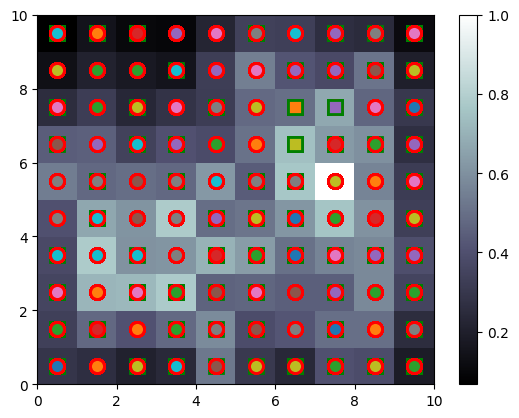

In [57]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],markeredgecolor=colors[y[i]],markerfacecolor=None,markersize=10,markeredgewidth=2)

show()

## Finding the Frauds

In [59]:
mappings = som.win_map(X)
frauds = mappings[(7,5)]

In [60]:
frauds = sc.inverse_transform(frauds)

In [61]:
print(frauds)

[[ 1.71000000e+02 -9.57819798e-01  2.47979463e-01 ... -1.79223585e-01
  -1.71543640e-01  7.16900000e+01]
 [ 2.56000000e+02 -1.37724533e+00  7.14822534e-01 ... -3.22347377e-02
   1.39840723e-01  1.35300000e+01]
 [ 4.14000000e+02 -3.76162266e-01  4.60564985e-01 ... -7.10606783e-05
  -8.32022276e-02  2.99900000e+01]
 ...
 [ 3.86220000e+04 -9.91131271e-01  3.75403814e-01 ... -9.92609432e-01
  -5.53303303e-01  5.27000000e+01]
 [ 3.86240000e+04 -1.73858343e+00  7.33065774e-01 ... -1.06341450e+00
  -5.76007131e-01  3.66800000e+01]
 [ 3.87190000e+04 -1.24117778e+00  9.13341168e-01 ... -1.52694862e-01
  -5.77218049e-03  5.45000000e+00]]
